<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Analyzing IMDb Data

_Authors: Kevin Markham (DC), Jeff Hale (DC)_

---

### Let's explore movie ratings from IMDB.

For these exercises you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming more comfortable with pandas. Complete all the Basic and Intermediate level questions and then go as far as you like to develop your skills!

## Basic level

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [139]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [140]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [141]:
print('columns:', len(movies.columns))
print('rows:', len(movies))

columns: 6
rows: 979


Source: https://note.nkmk.me/en/python-pandas-len-shape-size/

#### Check the data type of each column.

In [142]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [143]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [144]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


Source: https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

#### Create a histogram of duration, choosing an appropriate number of bins.

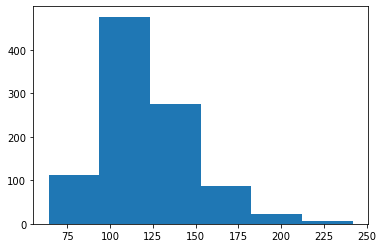

In [145]:
plt.hist(movies['duration'], bins = 6);

#### Use a box plot to display that same data.

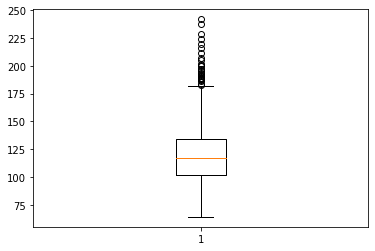

In [146]:
plt.boxplot(movies['duration']);

In [147]:
import seaborn as sns

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


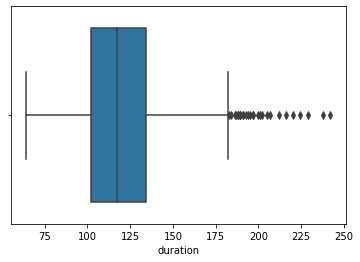

In [148]:
sns.boxplot(movies['duration']);

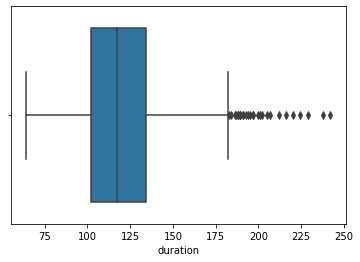

In [149]:
sns.boxplot(data = movies, x = 'duration');

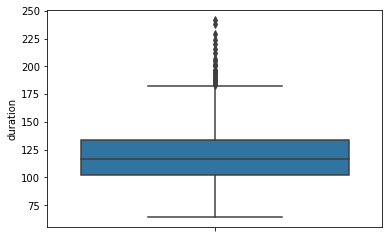

In [150]:
sns.boxplot(data = movies, y = 'duration');

#### Count how many movies have each of the content ratings.

In [151]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

## Intermediate level

#### Use a visualization to display that same data, including a title and x and y labels.

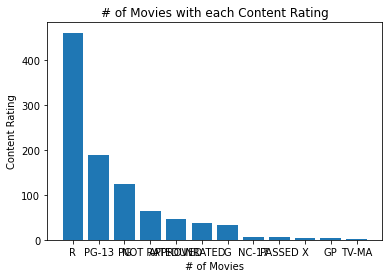

In [152]:
plt.bar(x = movies['content_rating'].value_counts().index, height = movies['content_rating'].value_counts())
plt.title('# of Movies with each Content Rating')
plt.xlabel('# of Movies')
plt.ylabel('Content Rating');

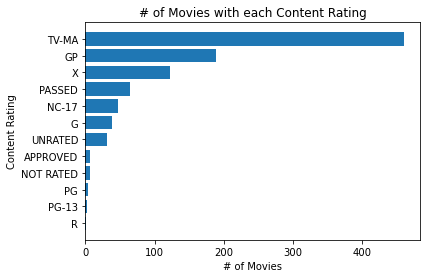

In [153]:
plt.barh(y = movies['content_rating'].value_counts().index, width = movies['content_rating'].value_counts(ascending = True))
plt.xlabel('# of Movies')
plt.ylabel('Content Rating')
plt.title('# of Movies with each Content Rating');

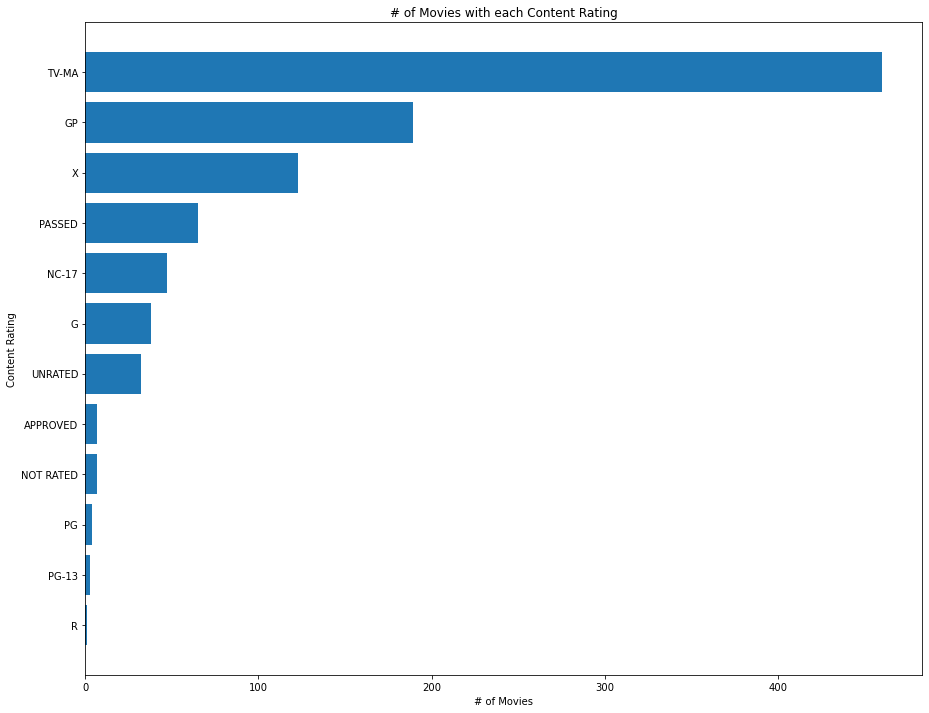

In [154]:
plt.figure(figsize = (15, 12))
plt.barh(y = movies['content_rating'].value_counts().index, width = movies['content_rating'].value_counts(ascending = True))
plt.xlabel('# of Movies')
plt.ylabel('Content Rating')
plt.title('# of Movies with each Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [155]:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

In [156]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

Source: https://datatofish.com/replace-values-pandas-dataframe/

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [157]:
movies['content_rating'] = movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [158]:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [159]:
print(movies[movies['content_rating'].isna()])

     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


Source: https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null

In [172]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [173]:
movies.iloc[187, 1]

'Butch Cassidy and the Sundance Kid'

In [174]:
movies.iloc[649, 1]

'Where Eagles Dare'

In [175]:
movies.iloc[936, 1]

'True Grit'

In [176]:
movies.iloc[187, 2] = 'PG'

Source: https://www.imdb.com/title/tt0064115/

In [177]:
movies.iloc[649, 2] = 'PG'

Source: https://www.imdb.com/title/tt0065207/
Source: http://www.screenonline.org.uk/film/id/594087/index.html

The M rating evolved into the PG rating.

In [178]:
movies.iloc[936, 2] = 'G'

Source: https://www.imdb.com/title/tt0065126/

In [179]:
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [181]:
movies.iloc[187, 1:3]

title             Butch Cassidy and the Sundance Kid
content_rating                                    PG
Name: 187, dtype: object

In [182]:
movies.iloc[649, 1:3]

title             Where Eagles Dare
content_rating                   PG
Name: 649, dtype: object

In [183]:
movies.iloc[936, 1:3]

title             True Grit
content_rating            G
Name: 936, dtype: object

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [210]:
movies['star_rating'].mean()

7.8897854954034985

In [214]:
movies.groupby(movies['duration'] > 120).mean()

,star_rating,duration
duration,,
False,7.83849,102.988950
True,7.95367,143.385321


#### Use a visualization to detect whether there is a relationship between duration and star rating.

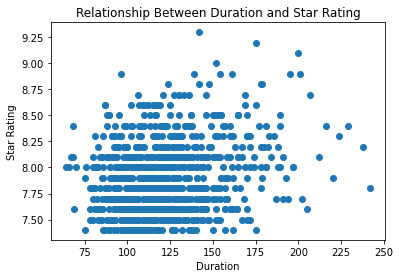

In [233]:
plt.scatter(x = movies['duration'], y = movies['star_rating'])
plt.xlabel('Duration')
plt.ylabel('Star Rating')
plt.title('Relationship Between Duration and Star Rating');

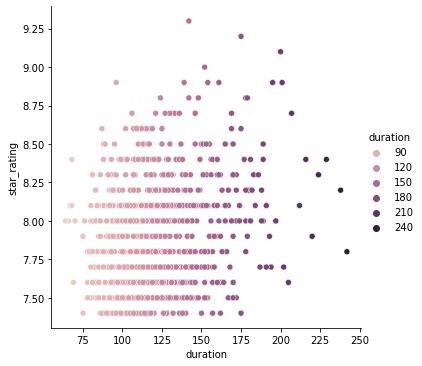

In [234]:
sns.relplot(
    data = movies,
    x = "duration", y = "star_rating",
    hue = "duration"
);

#### Calculate the average duration for each genre.

In [235]:
movies.groupby('genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

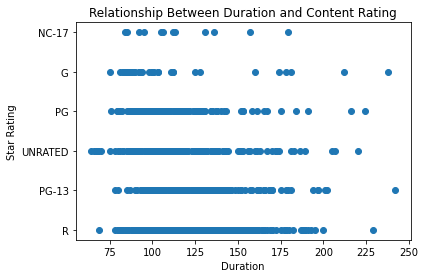

In [237]:
plt.scatter(x = movies['duration'], y = movies['content_rating'])
plt.xlabel('Duration')
plt.ylabel('Star Rating')
plt.title('Relationship Between Duration and Content Rating');

There's probably a better visualization I could've used here, but... I was tired. =/

#### Determine the top rated movie (by star rating) for each genre.

In [241]:
movies.sort_values(['star_rating'], ascending = False).groupby('genre').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


Source: https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [256]:
movies[movies.duplicated(['title'])]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

In [257]:
movies[movies.duplicated(['title'])].count()

star_rating       4
title             4
content_rating    4
genre             4
duration          4
actors_list       4
dtype: int64

In [268]:
movies.loc[movies['title'] == 'The Girl with the Dragon Tattoo']

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


The Girl with the Dragon Tattoo is the only one that looks like it could be a duplicate.

In [269]:
movies.loc[movies['title'] == 'Dracula']

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [270]:
movies.loc[movies['title'] == 'Les Miserables']

,star_rating,title,content_rating,genre,duration,actors_list
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [271]:
movies.loc[movies['title'] == 'True Grit']

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [286]:
movies.groupby('genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [290]:
genre_10 = movies.groupby('genre').count(['title'] >= 10)

TypeError: '>=' not supported between instances of 'list' and 'int'

I think I have to use split-apply-combine here, but... I couldn't ever quite get it.

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

## Bonus

#### Find something interesting using the actors data! Share your findings.